# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


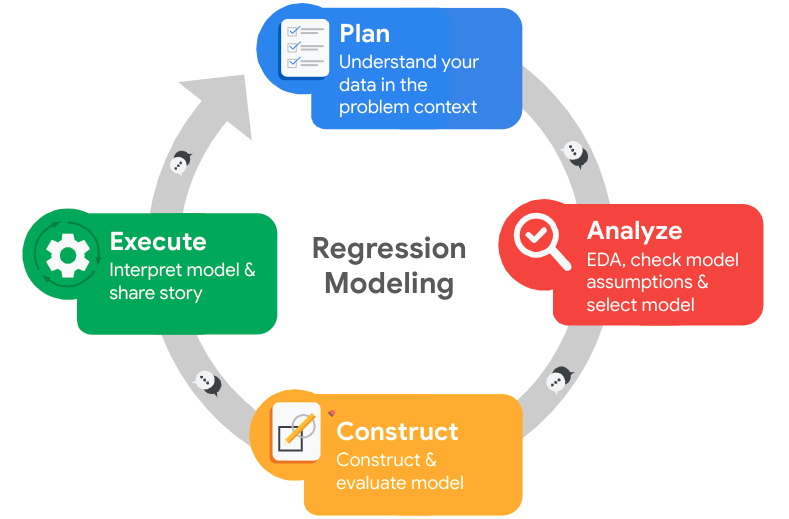

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* Response

    * Stakeholders for this project include:

        - Salifort's Senior Leadership Team: Responsible for setting the company's direction.

        - Salifort's Human Resource Department: Conducts employee surveys, collects turnover data, and implements retention strategies.

        - Employees: Indirectly affected by turnover rates and the company's retention efforts, though not directly involved in the project.

        - Other Stakeholders: Includes other data professionals in my department who will collaborate to address the business problem.

    * Project Goal:

        - The goal is to develop a predictive model that can anticipate employee turnover at Salifort Motors based on relevant data points such as job title, department, number of projects, and average monthly hours.

    * Initial Data Observations:

        - The dataset reveals no missing values and no apparent data integrity issues. However, I find it interesting that performance and satisfaction level values range from 0 to 1, which warrants further exploration.

    * Resources and References:

        - I frequently refer to my notebooks, online resources, library documentation, and other relevant sources.

    * Ethical Considerations:

        - Data Privacy and Security: Ensuring the protection of sensitive information.

        - Bias and Fairness: Addressing any potential biases in the data.

        - Anonymization and Aggregation: Although the project data doesn’t include Personally Identifiable Information (PII), it is important to keep this in mind.

        - Informed Consent: If involved in designing surveys or collecting employee data, ensuring that employees provide informed consent and understand how their data will be used.

        - Transparency: Clearly stating the methods used and any potential limitations of the model.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score


# logistic regression
from sklearn.linear_model import LogisticRegression

# Random forest
from sklearn.ensemble import RandomForestClassifier

# Decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# XGBoost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# For saving model
import pickle


### Load dataset

The pandas library is used to read a dataset named HR_capstone_dataset.csv. As shown in this cell, the dataset has been automatically loaded for you. There's no need to download the .csv file or provide additional code to access the dataset. Please proceed with the activity by following the instructions provided.

In [20]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [21]:
# Gather descriptive statistics about the data
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [22]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [23]:
# Rename columns as needed
df = (df.rename(columns={"average_montly_hours": "average_monthly_hours",
                       "time_spend_company": "tenure"})
       .rename(str.lower, axis="columns"))
# Display all column names after the update
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [24]:
# Check for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

* The data does not contain any missing values. This is great.

### Check duplicates

Check for any duplicate entries in the data.

In [25]:
# Check for duplicates
df.duplicated().sum()

3008

* There are 3008 duplicated instances in the dataset.

In [26]:
# Inspect some rows containing duplicates as needed
duplicated_rows = df[df.duplicated()]
duplicated_rows.head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

* The above output shows the head rows that are duplicated in the dataframe. 
How likely is it that these are legitimate entries? hmmmm! Doesn't seems very likely with several continuous variables across 10 columns. It seems unlikely that these observations are legitimate. You can proceed by dropping them.

In [27]:
# Drop duplicates and save resulting dataframe in a new variable as needed
print(f"Shape before dropping duplicate: {df.shape}")
df = df[~df.duplicated(keep='first')]

# Display first few rows of new dataframe as needed
print(f"Shape after dropping duplicate: {df.shape}")
df.head()

Shape before dropping duplicate: (14999, 10)
Shape after dropping duplicate: (11991, 10)


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

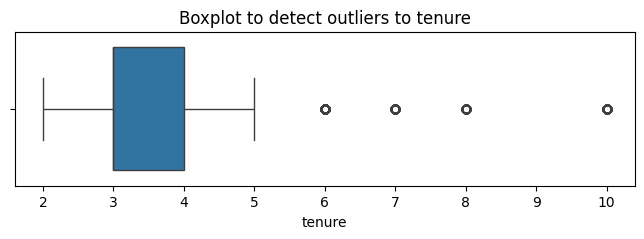

In [30]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8,2))
plt.title("Boxplot to detect outliers to tenure")
sns.boxplot(data=df, x="tenure")
plt.show()

In [33]:
# Determine the number of rows containing outliers
print('number of rows containing outliers',len(df.loc[df["tenure"] > 5]))
df.loc[df["tenure"] > 5].head()

number of rows containing outliers 824


satisfaction_level  last_evaluation  number_project  \
1                 0.80             0.86               5   
17                0.78             0.99               4   
34                0.84             0.87               4   
47                0.57             0.70               3   
67                0.90             0.98               4   

    average_monthly_hours  tenure  work_accident  left  promotion_last_5years  \
1                     262       6              0     1                      0   
17                    255       6              0     1                      0   
34                    246       6              0     1                      0   
47                    273       6              0     1                      0   
67                    264       6              0     1                      0   

     department  salary  
1         sales  medium  
17        sales     low  
34           hr     low  
47      support     low  
67  product_mng  medium

* Based on the boxplot, it can be determined that a tenure greater than 5 years is considered an outlier. Out of the entire dataset, 824 rows contain this outlier. It's worth investigating these rows further because, at first glance, it is not unreasonable for an employee to have more than 5 years of tenure at a company. More importantly, in the context of addressing high employee turnover, these rows can be seen as survey responses from 'loyal' employees whose insights could be valuable in addressing the problem. I'll return to this part of the analysis in the construction phase to explore these employees' responses in more detail.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

In [34]:
# Determine the number of rows containing outlier

def find_boundaries(df, variable, distance=1.5):
    """Find the boundary of a variable distribution"""
    
    # Compute the 25th percentile in `variable`
    percentile25 = df[variable].quantile(0.25)
    
    # Compute the 75th percentile in `variable`
    percentile75 = df[variable].quantile(0.75)
    
    # Compute the interquatile values in `variable`
    iqr = percentile75 - percentile25
    # Define the upper and lower boundary
    lower_boundary = percentile25 - distance*iqr
    upper_boundary = percentile75 + distance*iqr
    print(f"Lower limit: {lower_boundary}")
    print(f"Upper limit: {upper_boundary}")
    
    return lower_boundary, upper_boundary

# Determine the limit for non-outlier values in `tenure`
lower_limit, upper_limit = find_boundaries(df, "tenure")

# Subset the data containing outliers in tenure
outliers_tenure = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers_tenure))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [35]:
df[(df['tenure']< upper_limit) & (df['tenure'] > lower_limit)].shape

(11167, 10)

# PACE: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Response**

- There is no linear relationship between any of the variables. However, there are positive correlations between average monthly hours, number of projects, and evaluation scores. The variable 'left' and satisfaction levels are negatively correlated.
- I have not performed any transformation of variables at this stage.
- EDA is a great tool for uncovering patterns, trends, and relationships within the dataset. It helps us ask the right questions and guides our further analysis effectively.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [36]:
df.shape

(11991, 10)

In [37]:
df["left"].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [38]:
# Get numbers of people who left vs. stayed
num_of_people_who_left = df["left"].value_counts()
print(f"The number of employees who left: {num_of_people_who_left[1]}")
# Get percentages of people who left vs. stayed
percent_left = df["left"].value_counts(normalize=True)
print(f"The percentage of employees who left: {percent_left[1] * 100:.3}%")

The number of employees who left: 1991
The percentage of employees who left: 16.6%


In [39]:
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

* What are the variables I am interested in?

`satisfaction_level`, `number_project`, `tenure`, `department`, `salary`, `average_monthly_hours`

1. **Boxplot** are very useful in visualizing distributions within data. Compare distributions of numerical variables between employees who stayed and those who left
    
    `average_monthly_hours` vs `number_project`.
    
    `tenure` vs `satisfaction_level`
    
    
2. **Histogram**: Graphical representation of a frequency distribution, which shows how frequently each value in a dataset or variable occurs. For example, plot of a stacked histogram to visualize the distributions of employees who stayed versus those who left.

    `number_project` vs `left`
    `department` vs `left`
    

3. **Scatterplot**: A scatter plot is a type of plot that displays values for two variables as points on a Cartesian plane. It's useful for visualizing the relationship between two continuous variables.

    `average_monthly_hours` vs `satisfaction_level`
    
    `average_monthly_hours` vs `last_evaluation`
    
    `average_monthly_hours` and `promotion_last_5years`

* Relationship between `satisfaction_level` and `salary`
* Relationship between `satisfaction_level` and `department`


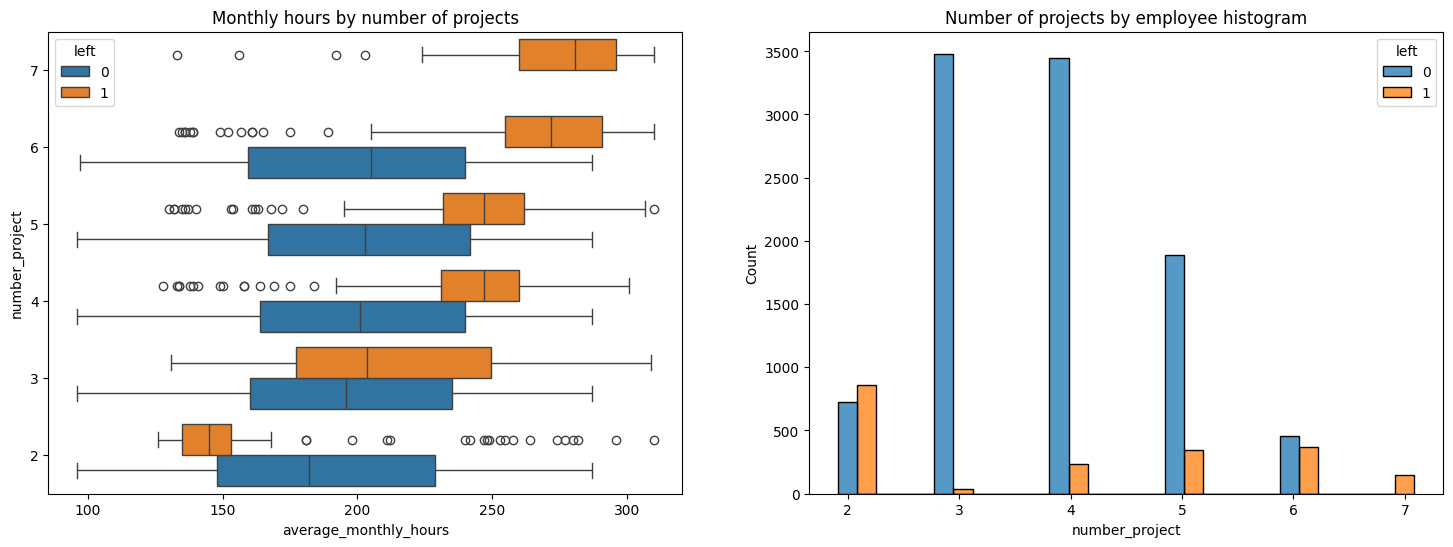

In [42]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(18,6))

# Create the boxplot showing `average_monthly_hours` distribution for `number_project`
sns.boxplot(data=df, x="average_monthly_hours", y="number_project", hue="left", orient="h", ax=ax[0])
ax[0].set_title("Monthly hours by number of projects")
ax[0].invert_yaxis()

# Create a histogram showing distribution of `number_project`, comparing those who `left`.
tenure_stay = df.loc[df["left"] == 0, "number_project"]
tenure_left = df.loc[df["left"] == 1, "number_project"]
sns.histplot(data=df, x="number_project", hue="left", multiple="dodge", shrink=2, ax=ax[1])
ax[1].set_title("Number of projects by employee histogram")

plt.show()

It's expected that employees working on more projects would also put in longer hours. This is reflected in our data, where the mean values for both groups (those who stayed and those who left) increase with the number of projects worked. However, a few notable points emerge from the plot:

1-  There are two distinct groups among employees who left the company:

        * Group A: Employees who worked fewer hours than their peers with the same number of projects, potentially indicating they were fired.

        * Group B: Employees who worked significantly more hours than their peers, suggesting they may have resigned voluntarily due to overwork.

2-  The optimal number of projects for employee retention appears to be 3-4, as the ratio of employees who left versus stayed is very small in this group.

3-  Assuming a work week of 40 hours and 2 weeks of vacation per year, the average number of working hours per month for employees working Monday-Friday is calculated as: 
Average monthly hours=(49 weeks × 40 hours per week) / 12 months ≈ 166.67  hours per month

This calculation shows that aside from employees working on two projects, every group worked considerably more hours than the 'normal average' of ~167 hours per month, indicating potential overwork.

4-  All employees handling 7 projects left the company. The interquartile ranges for those who left with 6 and 7 projects were ~244-295 hours/month, much higher than any other group. The average monthly hours for these groups were ~230-276 hours per month.

Next, I plan to investigate by how much employees with 6 and 7 projects overworked compared to the average working hours per month in the company. Additionally, I aim to confirm if all employees with seven projects indeed left.

In [43]:
avg_monthly_hours_7projects = df.loc[df["number_project"] == 7, "average_monthly_hours"].mean()
print(f"Mean monthly hours for employees with 7 project: {avg_monthly_hours_7projects}")
avg_monthly_hours_6projects = df.loc[df["number_project"] == 6, "average_monthly_hours"].mean()
print(f"Mean monthly hours for employee with 6 project: {avg_monthly_hours_6projects}")

avg_monthly_hours_for_all = df["average_monthly_hours"].mean()
print(f"Mean monthly hours for employee with less than 6 projects: {avg_monthly_hours_for_all}")


def calulate_overwork(work_hrs: float, normal_hrs:int=200)->float:
    """Compute overworked hours in percentage."""
    abs_difference = abs(work_hrs - normal_hrs)
    average_hours = (work_hrs + normal_hrs)/2
    percent_diff = abs_difference/average_hours * 100
    return round(percent_diff,2)

print(calulate_overwork(avg_monthly_hours_7projects))
print(calulate_overwork(avg_monthly_hours_6projects))

Mean monthly hours for employees with 7 project: 275.62068965517244
Mean monthly hours for employee with 6 project: 230.39225181598064
Mean monthly hours for employee with less than 6 projects: 200.4735218080227
31.8
14.12


This confirrms that employees with 6 and 7 projects worked 14% and 31% more than the avearge monthly hours  in the company. They indeed over worked.

In [46]:
# Get the values of stayed/left for employees with 7 projects
df.loc[df["number_project"] == 7, "left"].value_counts()

left
1    145
Name: count, dtype: int64

This confirms that all employees with seven project did leave

Next, I would examine the relationship between `average_monthly_hours` vs `satisfaction_level` 

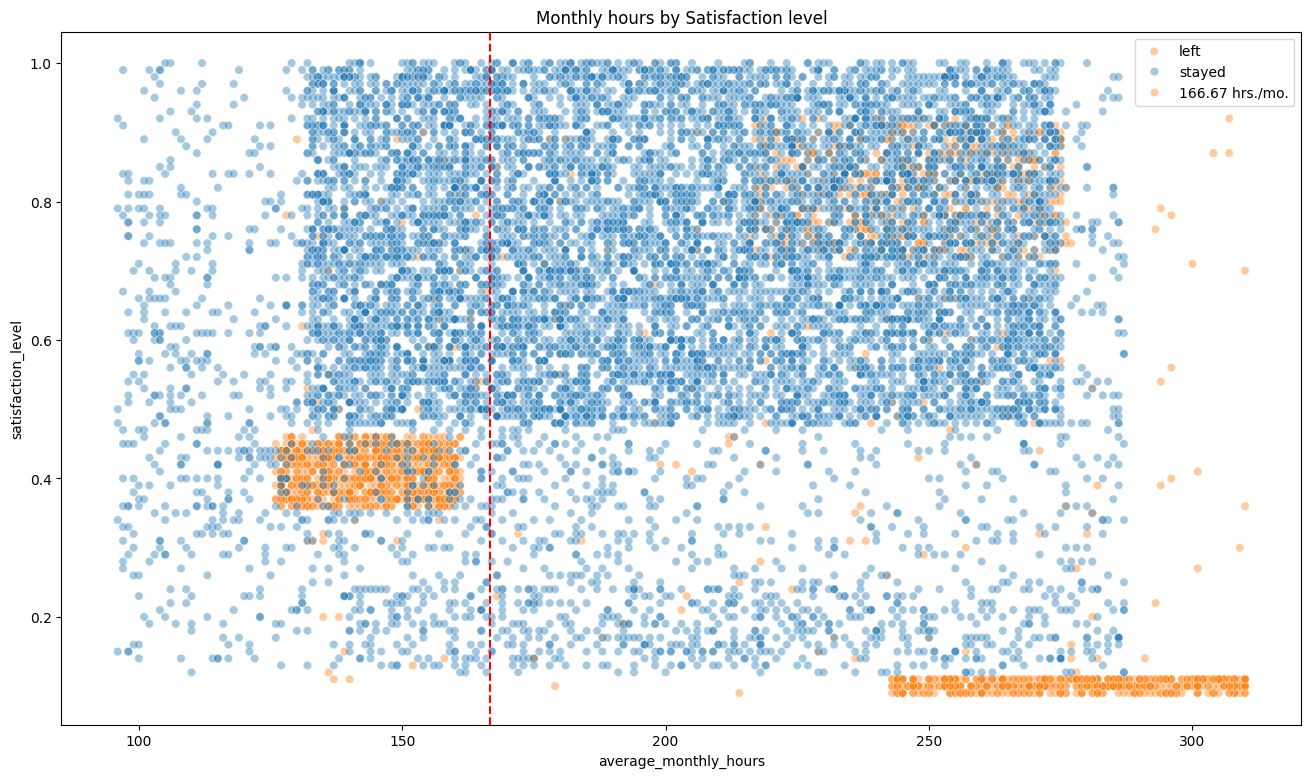

In [45]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(df, x="average_monthly_hours", y="satisfaction_level", hue="left", alpha=0.4)
plt.axvline(x=166.67, color="red", label="166.67 hrs./mo.", ls="--")
plt.legend(labels=["left", "stayed", "166.67 hrs./mo."])
plt.title("Monthly hours by Satisfaction level");

The scatterplot reveals that a sizable group of employees worked between ~240-315 hours per month. Working 315 hours per month translates to over 75 hours per week throughout the year, which is likely why their satisfaction levels are close to zero and why they all eventually left the company.

Interestingly, there's another group of employees who left despite working more normal hours (less than 166.67 hours per month). Their satisfaction levels were slightly below average (around 0.4). There could be several reasons for this:

*   Lack of Responsibility: These employees might feel underutilized or not trusted with enough responsibility, leading to dissatisfaction and eventual turnover.

*   Different Employment Contracts: They could belong to a different category of employees with peculiar contracts that limit their working hours, which might impact their satisfaction if they seek more engagement or responsibility.

*   Pressure from Peers: Seeing their colleagues working more hours could create a sense of pressure or insecurity, making them feel less valued or underperforming, leading to dissatisfaction.

Exploring these hypotheses further could provide valuable insights into the diverse factors affecting employee satisfaction and turnover.


Next, visaulize the relationship between `tenure` vs `satisfaction_level`

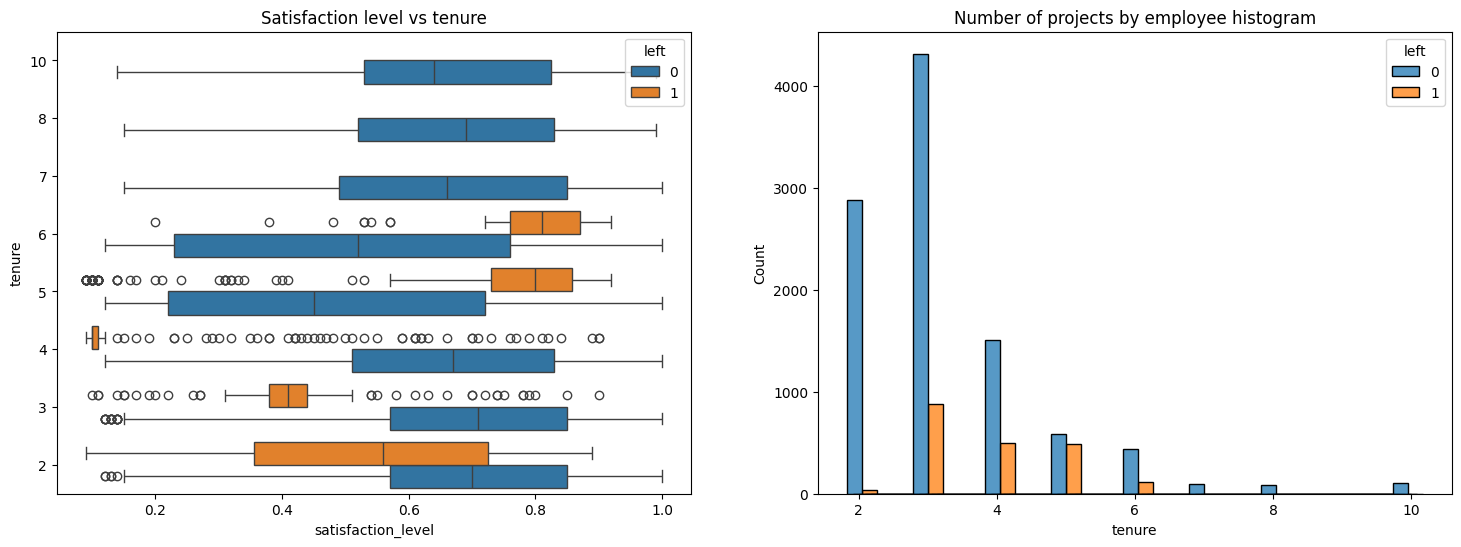

In [47]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(18,6))

# Create the boxplot showing `average_monthly_hours` distribution for `number_project`
sns.boxplot(data=df, x="satisfaction_level", y="tenure", hue="left", orient="h", ax=ax[0])
ax[0].set_title("Satisfaction level vs tenure")
ax[0].invert_yaxis()

# Create a histogram showing distribution of `number_project`, comparing those who `left`.
tenure_stay = df.loc[df["left"] == 0, "number_project"]
tenure_left = df.loc[df["left"] == 1, "number_project"]
sns.histplot(data=df, x="tenure", hue="left", multiple="dodge", shrink=5, ax=ax[1])
ax[1].set_title("Number of projects by employee histogram")

plt.show()


Here are several observations I made from this plot:

*   The majority of employees who left the company did so within the first 2 years.

*   The longest-serving employees remained at the company, and their satisfaction levels align with those of newer employees who stayed.

*   The histogram shows that there are relatively few longer-tenured employees. It's possible that they are in management positions or are higher-paid employees. This assumption needs to be confirmed by exploring the relationship between salary and tenure.

*   Employees who left after the fourth year seem to have an unusually low satisfaction level. It is worth investigating whether changes to company policy at the 4-year mark might have affected people’s satisfaction.

*   Employees who left generally fall into two categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.

These insights can help guide further analysis and inform strategies for improving employee retention.


Next step is to analyze, would be to check the mean and media of the statisfaction level of employees who left

In [50]:
df.groupby(["left"])["satisfaction_level"].agg(['mean', 'median'])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

It’s not surprising that employees who left have lower mean and median satisfaction levels compared to those who stayed. However, an interesting observation among the employees who stayed is that their mean satisfaction level is less than the median score. This indicates that satisfaction levels among those who stayed might be negatively skewed, meaning there are more lower values pulling the mean down, causing it to be lower than the median. This insight can be useful in identifying areas that may need improvement to boost overall employee satisfaction and retention.

Next, explore the relationship between `salary` and `tenure`

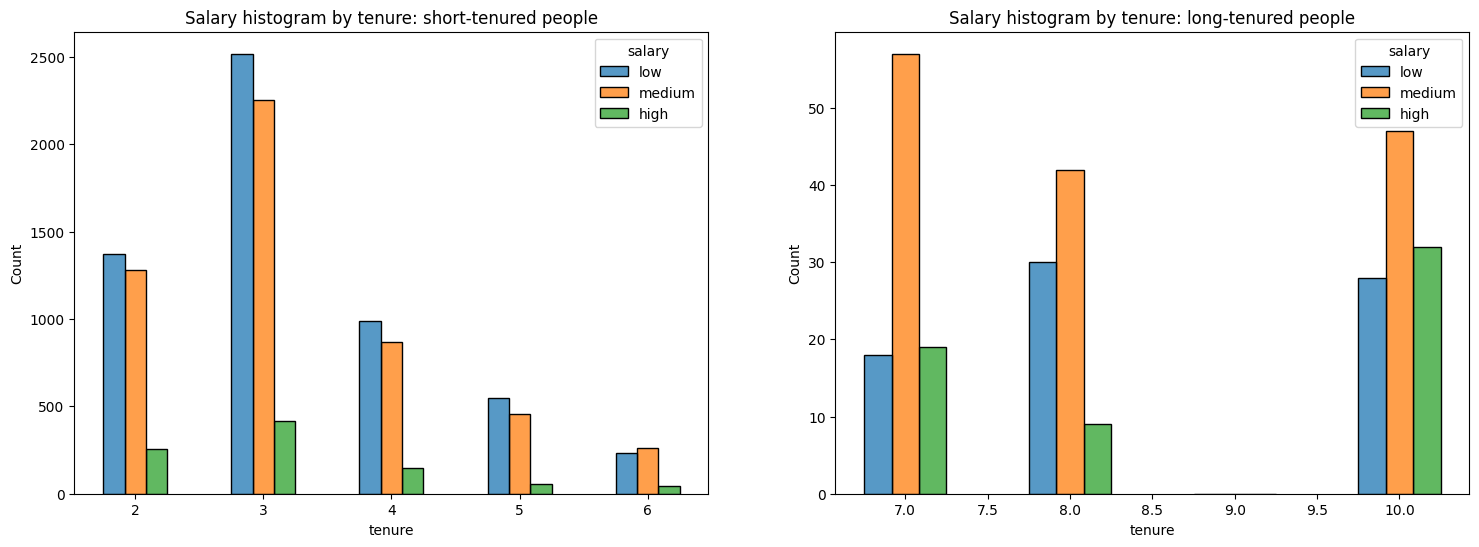

In [51]:
# Create a plot as needed
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (18,6))

# Define short tenure
tenure_short = df[df["tenure"] < 7]

# Define long tenure
tenure_long = df[df["tenure"] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x="tenure", hue="salary", discrete=1, hue_order=["low", "medium", "high"],
            multiple="dodge", shrink=0.5, ax=ax[0])
ax[0].set_title("Salary histogram by tenure: short-tenured people")

sns.histplot(data=tenure_long, x="tenure", hue="salary", discrete=1, hue_order=["low", "medium", "high"],
            multiple="dodge", shrink=0.5, ax=ax[1])
ax[1].set_title("Salary histogram by tenure: long-tenured people");

There is no disproportionate number of long-tenured employees with high salaries. In fact, more long-tenured employees fall into the medium salary category.

Interestingly, the histogram also shows that employees with short tenures often receive high salaries.

Next, you could explore whether there is a correlation between working long hours and receiving high evaluation scores. Consider creating a scatterplot of average monthly hours versus last evaluation to visualize this relationship.

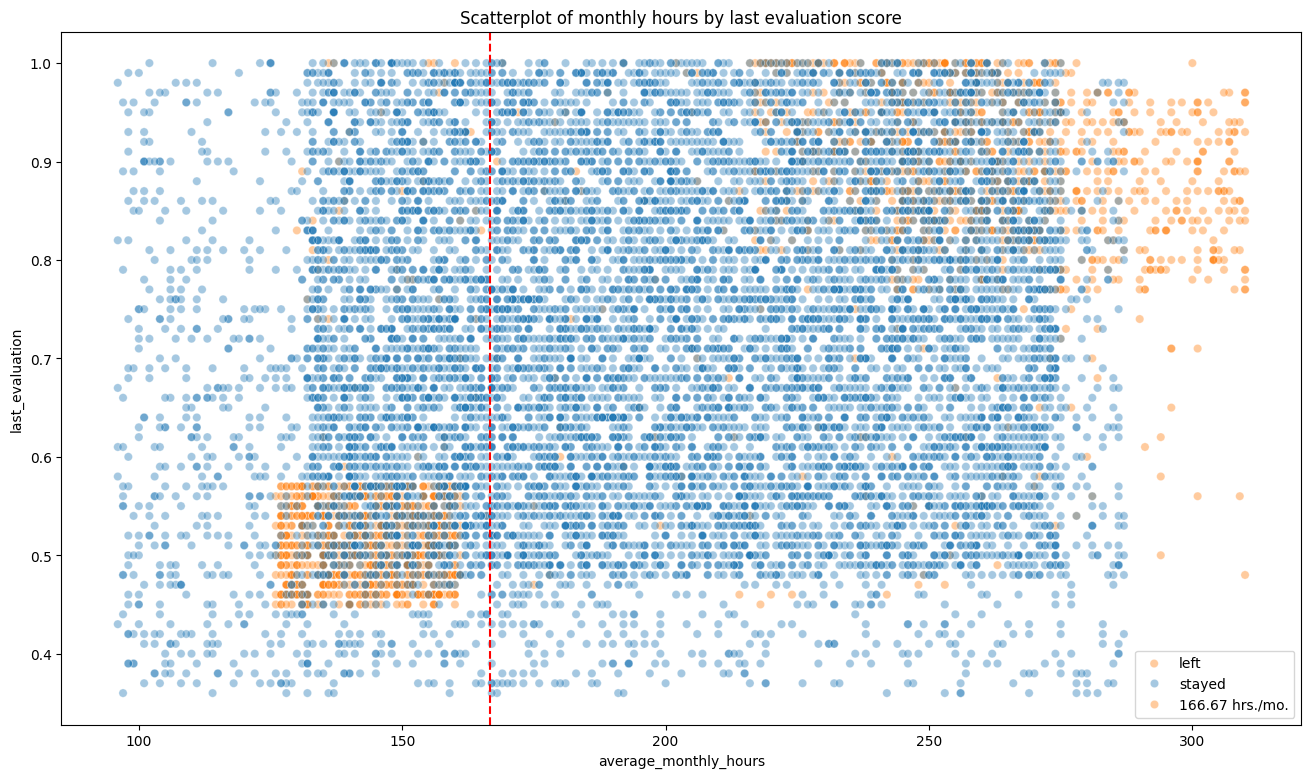

In [52]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x="average_monthly_hours", y="last_evaluation", hue="left", alpha=0.4)
plt.axvline(x=166.67, label="166.67 hrs./mo.", color="red", ls="--")
plt.legend(labels=["left", "stayed", "166.67 hrs./mo."])
plt.title("Scatterplot of monthly hours by last evaluation score")
plt.show()

The following observations can be made from the scatterplot above:

*   The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly below the nominal monthly average of 166.67 hours with lower evaluation scores.

*   There seems to be a correlation between hours worked and last evaluation scores.

*   Most employees in this company worked well above the nominal 166.67 hours per month.

*   The plot also shows that working long hours does not guarantee good evaluations.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

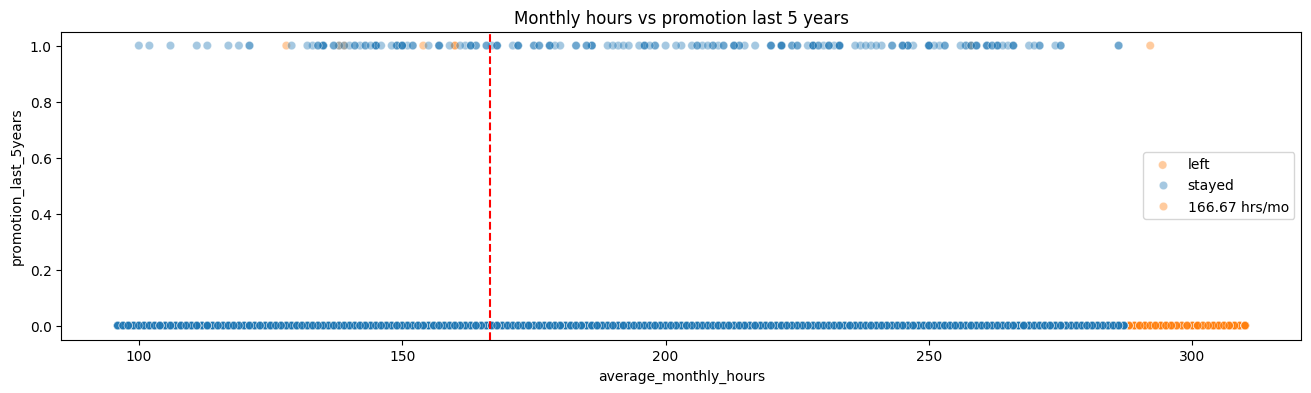

In [54]:
# Create a plot as needed
plt.figure(figsize=(16,4))
sns.scatterplot(data=df, x="average_monthly_hours", y="promotion_last_5years", hue="left", alpha=0.4)
plt.axvline(x=166.67, color="red", ls="--")
plt.legend(labels=["left", "stayed", "166.67 hrs/mo"])
plt.title("Monthly hours vs promotion last 5 years")
plt.show()

The plot reveals the following insights:

*   Very few employees were promoted in the last five years.

*   A small number of employees who worked the most hours received promotions.

*   All employees who left the company were working the longest hours.

Next, let's inspect how the employees who left are distributed across different departments.

In [55]:
df["department"].value_counts()


department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

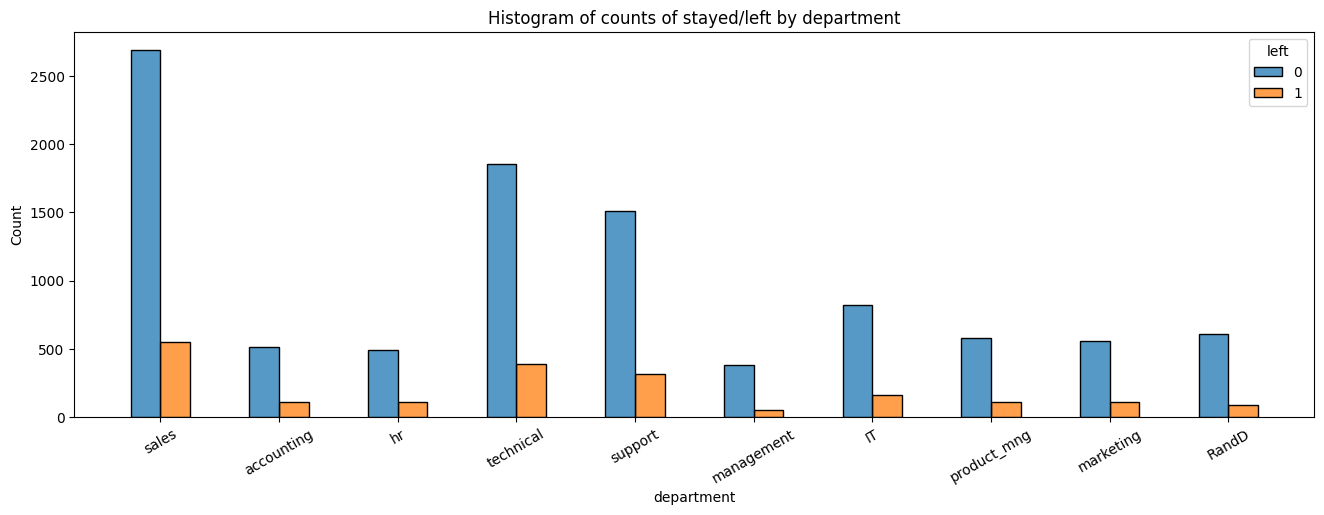

In [56]:
# Create a plot as needed

# Create a histogram to compare department distribution of employee who left

plt.figure(figsize=(16, 5))
sns.histplot(data=df, x="department", hue="left", discrete=1, 
             hue_order=[0,1], multiple="dodge", shrink=0.5)
plt.xticks(rotation=30)
plt.title("Histogram of counts of stayed/left by department");



There doesn't seem to be any department that significantly differs in its proportion of employees who left compared to those who stayed.

Lastly, let's check for strong correlations between variables in the data.

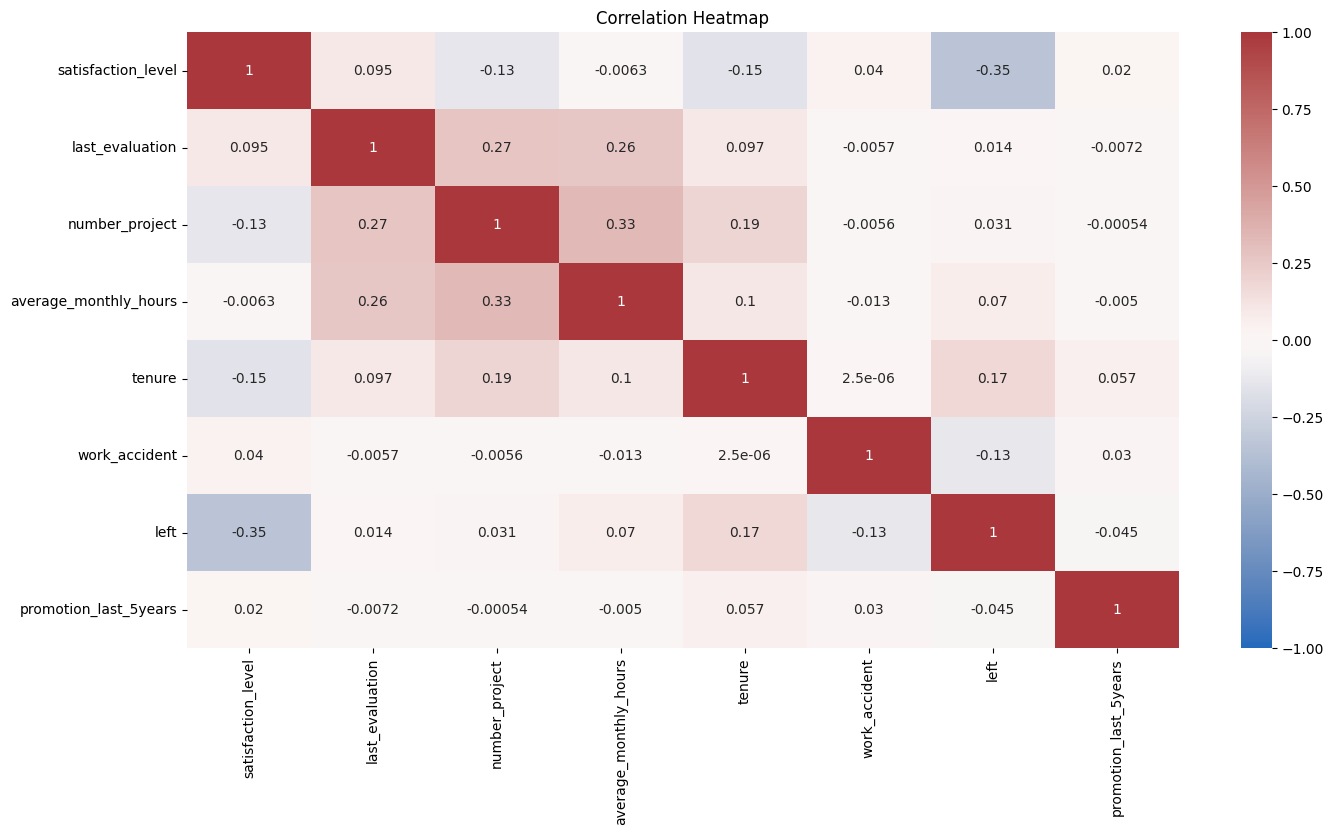

In [57]:
plt.figure(figsize=(16,8))
heatmap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, 
                      annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title("Correlation Heatmap");

The heatmap confirms that last_evaluation, number_project, and average_monthly_hour all have positive correlations with each other. On the other hand, whether an employee leaves is negatively correlated with satisfaction_level. Similarly, tenure and satisfaction_level are negatively correlated.

### Insights

From the EDA, it's evident that employees leaving the company are linked to longer working hours, numerous projects, and generally lower levels of satisfaction. It's demoralizing to work for extended hours or manage multiple projects without additional incentives such as promotions or good evaluation scores.

Given the number of employees working increasingly long hours, it's reasonable to infer that a significant number of employees are likely experiencing burnout.

Additionally, employees with tenure longer than 5 years tend to remain with the company.

Overall, there seems to be a case for potential mismanagement within the company. Addressing these issues could be crucial in improving employee retention and satisfaction.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. This task involves classification, specifically binary classification, since the outcome variable left can be either 1 (indicating the employee left) or 0 (indicating the employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the variable you want to predict (whether an employee leaves the company) is categorical, you could either build a Logistic Regression model or a Tree-based Machine Learning model.

### Modeling A: Logistic Regression Model

This approach covers the use of logistic regression model.  

In [58]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

<a id='encode'></a>
* `department` is a categorical feature, which means it must be dummied for modelling.

* `salary` is categorical but it's ordinal i.e. the categories have a natural order. In this case, low, medium and high. Better  not to dummy this column but rather to convert the levels to numbers 0-2.


##### Save the data


In [59]:
# Save this dataset to csv
df.to_csv("cleaned_hr_dataset.csv", index=False)

In [60]:
df_enc = df.copy()

# Encode the Salary variable as an ordinal numeric category
ordinal_mapping = {"low": 0,"medium": 1, "high": 2}
df_enc["salary"] = df_enc["salary"] .map(ordinal_mapping)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

Create a heatmap to visualaize how correlated variables are.
What variables am I interested in examining correlation between ?


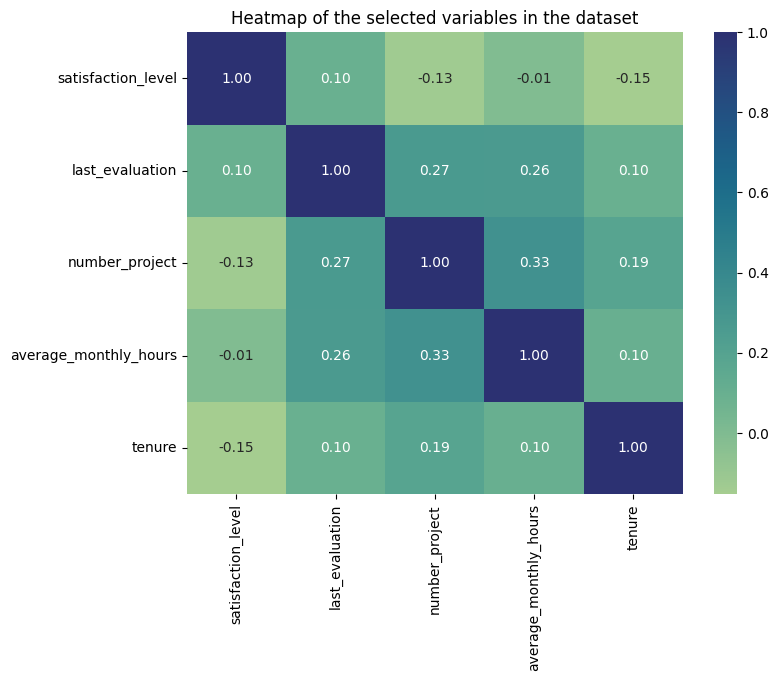

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[["satisfaction_level", "last_evaluation", "number_project", "average_monthly_hours", "tenure"]].corr(), annot=True, fmt=".2f", cmap="crest")
plt.title("Heatmap of the selected variables in the dataset")
plt.show()

One of the assumptions for logistic regression is no severe multicollinearity among the features. Considering this assumption and examining the heatmap, the pairs of variables with the highest correlation coefficients are num_project and average_monthly_hours (0.33), followed by last_evaluation and num_project. While these are positive correlations, they are not strong. Therefore, we satisfy the assumption to build the logistic regression model.

We can proceed to the next step.

<a id="outlier">Outlier</a>


Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to address the outlier found in the `tenure` column of our dataset

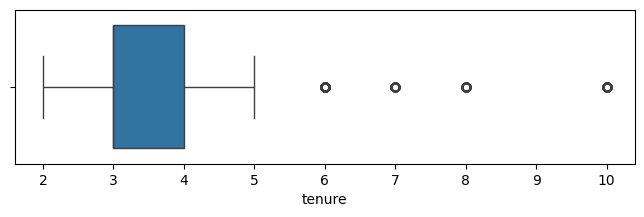

In [64]:
plt.figure(figsize=(8, 2))
sns.boxplot(df["tenure"], orient="h");

In [65]:
# Select the rows without outliers in `tenure` and save resulting dataframe
lower_limit, upper_limit = find_boundaries(df_enc, "tenure")

# df_logreg = df_enc[(df_enc["tenure"] >= lower_limit) & (df_enc["tenure"] <= upper_limit)]
# df_logreg
outliers = np.where(df_enc["tenure"] > upper_limit, True,
                   np.where(df_enc["tenure"] < lower_limit, True, False))

# Create a dataframe of the outliers
outliers_df = df_enc.loc[outliers, "tenure"]

# Select row without outliers in `tenure` and save the result in a new df
df_reg = df_enc.loc[~outliers]
df_reg.head()

Lower limit: 1.5
Upper limit: 5.5


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

### <a id="train_test_split">Modeling<a/>


Isolate the outcome variable, and select the features to use in the model

In [66]:
# Isolate the outcome variable

y = df_reg["left"]

# Display first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Next, Select the features to use in the model. Refering the my PACE document and EDA, for the first iteration of the model, I will be using all the variables out dataset.

In [67]:
# Select all the features but `left`
X = df_reg.drop("left", axis=1)

# Display the first few rows of the selected features
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   
5       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

Split the data into training and testing set. Because of the observed imbalance shown in the plot above, setting the Stratify parameter based on the values of the claass of `y` is a good choice.


In [68]:
# Split the data into training set and testng set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_trs=scaler.transform(X_train)
X_tes=scaler.transform(X_test)

In [72]:
# Construct a logistic regression model and fit the model

model = LogisticRegression(random_state=0)


log_clf = model.fit(X_trs, y_train)

In [73]:
# Use logistic regression to get predictions on the test data
y_pred = log_clf.predict(X_tes)


Create a confusion matrix to visualize the results of the logistic regression model

<a id='lr'></a>

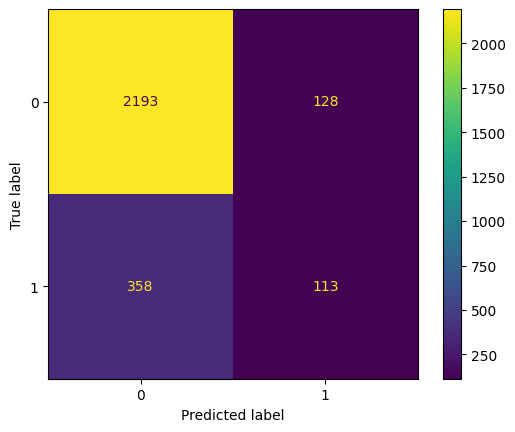

In [74]:
# Compute tthe value of the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create dispay of confusion matrix
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)

# Plot confusion matix
cm_disp.plot(values_format="")

# Display plot
plt.show()

The upper quadrant displays the number of true negatives: The number of employee who stayed that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of employees who stayed that the model misclassified as employee who left.

The lower-left quadrant displays the number of false negatives: the number of employees who left that the model misclassified as employee who stayed.

The lower-right quadrant displays the number of true positives: the number of employees who left that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives. Clearly this is not the case with our model.

Create a classification report that includes precision, recall, f1-score and accuracy metrics to evaluate the performance of the logistic regression model.


Check the class balance in the data. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64


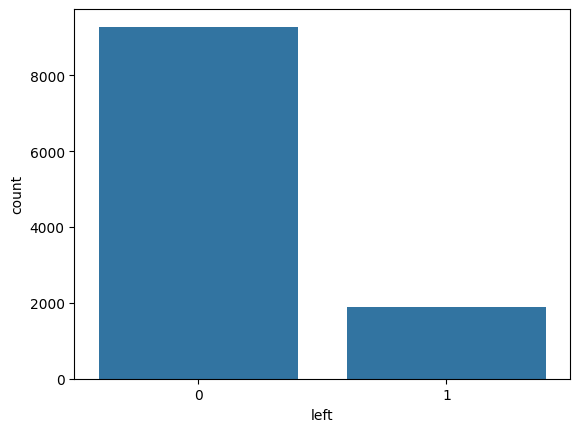

In [75]:
# Check for data imbalance within the output variable
print(y.value_counts(normalize=True))

# Display the class imbalance in the outcome variable
sns.countplot(data=df_reg, x=y);



There is an approximately 83%-17% split in the data. While it is not perfectly balanced, it is not too imbalanced either. If the data were more severely imbalanced, resampling might be necessary to achieve a better balance. In this case, you can proceed with the current data without modifying the class balance and continue evaluating the model.

In [76]:
target_labels = ["Stayed(Would not leave)", "Left (Would leave)"]
print(classification_report(y_test, y_pred, target_names=target_labels))

                         precision    recall  f1-score   support

Stayed(Would not leave)       0.86      0.94      0.90      2321
     Left (Would leave)       0.47      0.24      0.32       471

               accuracy                           0.83      2792
              macro avg       0.66      0.59      0.61      2792
           weighted avg       0.79      0.83      0.80      2792



The classification report shows that the logistic regression model achieved a precision of 47% and a recall of 24%, with an overall accuracy of 83%. Note that the precision and recall scores are taken from the "left" class because our goal is to predict employees who leave. These scores are significantly low.

The next step would be to apply an optimization technique by setting the class_weight parameter of the model to "balanced" and see if it improves the model's performance metrics.

In [77]:
model1 = LogisticRegression(random_state=0, class_weight="balanced")
log_clf_1 = model1.fit(X_trs, y_train)
y_pred_1 = log_clf_1.predict(X_tes)


target_labels = ["Stayed(Would not leave)", "Left (Would leave)"]
print(classification_report(y_test, y_pred_1, target_names=target_labels))

                         precision    recall  f1-score   support

Stayed(Would not leave)       0.98      0.82      0.89      2321
     Left (Would leave)       0.51      0.91      0.66       471

               accuracy                           0.84      2792
              macro avg       0.75      0.87      0.77      2792
           weighted avg       0.90      0.84      0.85      2792



The classification report above shows that the logistic regression model perfomed better. We achieved a precision of 51%, recall of 91%, f1-score of 66% for the target class `Left (Would leave)`, and accuracy of 84%. This is compareably better than the previous model. 

Next, lets plot the confusion matrix

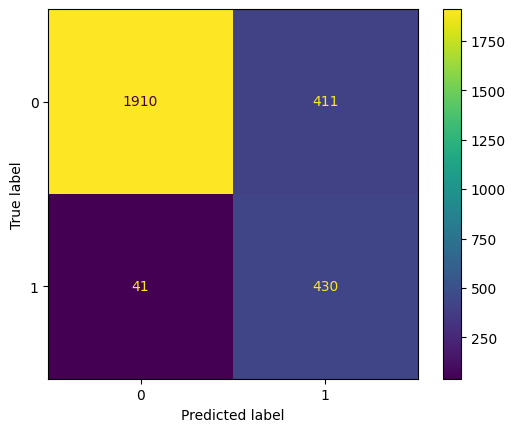

In [78]:
# Compute tthe value of the confusion matrix
cm_1 = confusion_matrix(y_test, y_pred_1, labels=log_clf_1.classes_)

# Create dispay of confusion matrix
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=log_clf_1.classes_)

# Plot confusion matix
cm_disp.plot(values_format="")

# Display plot
plt.show()

The plot show an improvement in lower right quadrant-the number of True positive. ie the number of employees who left that model correctly predicted. This is as a result of the improved `recall_score`, 91% compared to 24% previously.

Next, would be to calculate the true positive rate and false positive rate and create ROC curve using Matplotlib.

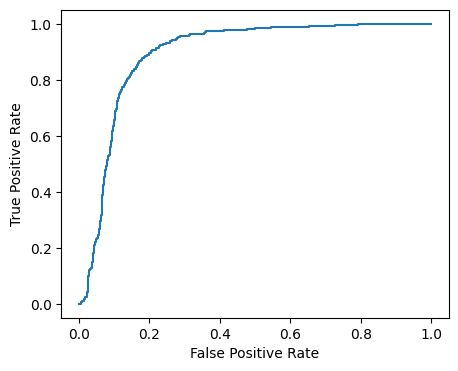

In [79]:
y_pred_proba = log_clf.predict_proba(X_tes)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


#create ROC curve
plt.figure(figsize=(5,4))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The more the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

As we can see, the model does a pretty good job at classifying employees as either leaving or staying. To quantify this, we can calculate the AUC (Area Under the Curve), which tells us how much of the plot is under the curve.

The closer the AUC is to 1, the better the model. A model with an AUC of 0.5 or less is no better than a model that makes random classifications.

Next, let's calculate the AUC.

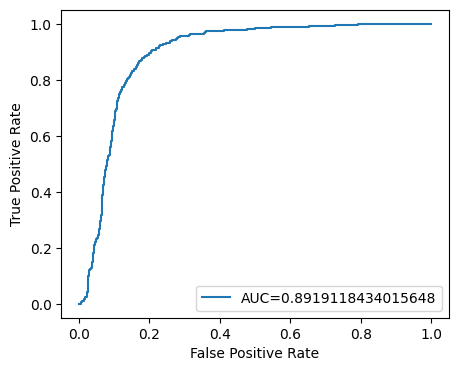

In [80]:
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.figure(figsize=(5,4))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The AUC for this logistic regression model is 0.892. Since this is close to 1, it confirms that the model does a pretty good job of classifying employees who will stay or leave the company.

The next step is to interpret the model coefficients to understand the impact of each feature on the prediction.

In [83]:
# Get the feature names from the model and model coefficients (which represents log-odds ratios)
# place inot a  DataFrame from readability
pd.DataFrame(data={"Features Name": X_train.columns, "Model Coefficients": log_clf.coef_[0]})

Features Name  Model Coefficients
0       satisfaction_level           -1.089826
1          last_evaluation           -0.015520
2           number_project           -0.530384
3    average_monthly_hours            0.160419
4                   tenure            0.930983
5            work_accident           -0.538754
6    promotion_last_5years           -0.099460
7                   salary           -0.320715
8            department_IT            0.002839
9         department_RandD           -0.077142
10   department_accounting           -0.034878
11           department_hr            0.023345
12   department_management           -0.022140
13    department_marketing           -0.003069
14  department_product_mng           -0.015369
15        department_sales            0.034186
16      department_support            0.003150
17    department_technical            0.029572

### Modeling Approach B: Tree-based Model

This approach covers implementation of Decision Tree and Random Forest

#### Create the training and testing data 

Put 75% of the data into a training set and the reamaining 25% into a testing set


In [84]:
y = df_enc["left"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

**Select the features**

In [85]:
# Select the features
X = df_enc.drop("left", axis=1)

# Display the first few rows
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [86]:
# Split the data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Decision tree - First iteration

Construct a decision tree model and set up cross-validated grid-search to exhaustively  search the best model parameters

In [89]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over

cv_params = {"max_depth": [4, 6, 8, None ],
            "min_samples_leaf": [1, 3, 5],
            "min_samples_split": [2, 4, 6]}

# Assign a dictionary of scoring metrics to capture 
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Instantiate Gridsearch
tree1 = GridSearchCV(decision_tree,
                     cv_params,
                     scoring=scoring,
                     cv=4,
                     refit="roc_auc")



In [90]:
%%time
# fit the decision
tree1.fit(X_train, y_train)

CPU times: total: 7.05 s
Wall time: 7.63 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Identify the optimal values for the decision tree parameters

In [91]:
# Check the best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

Identify the best AUC scores acheived by the decision tree model on the training set


In [92]:
tree1.best_score_

0.9688735287591919

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, write a function that will extract all the scores from the grid search`

In [ ]:
def make_results(model_name, model_object, metric):
   

    # Get all the results from the CV and put them in a dataframe
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the dataframe with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results["mean_test_f1"].idxmax(), :]
    
    # Extract accuracy, precision, recall and f1 score from the row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    auc = best_estimator_results.mean_test_roc_auc
    
    # Create table of result
    table = pd.DataFrame({"Model": [model_name],
                         "F1": [f1],
                         "recall": [recall],
                         "precision": [precision],
                         "accuracy": [accuracy], 
                         "auc": [auc]})
    return table

 Use the function to get all the scores from the grid search

In [95]:
# Get all CV scores
tree1_cv_results = make_results("Decision tree cv", tree1, "auc")
tree1_cv_results

Model        F1    recall  precision  accuracy      auc
0  Decision tree cv  0.947412  0.922352   0.973961  0.982987  0.96496

All the scores from the decision tree model are strong indicators of a good model performance.

Next we plot the 'best' decision tree



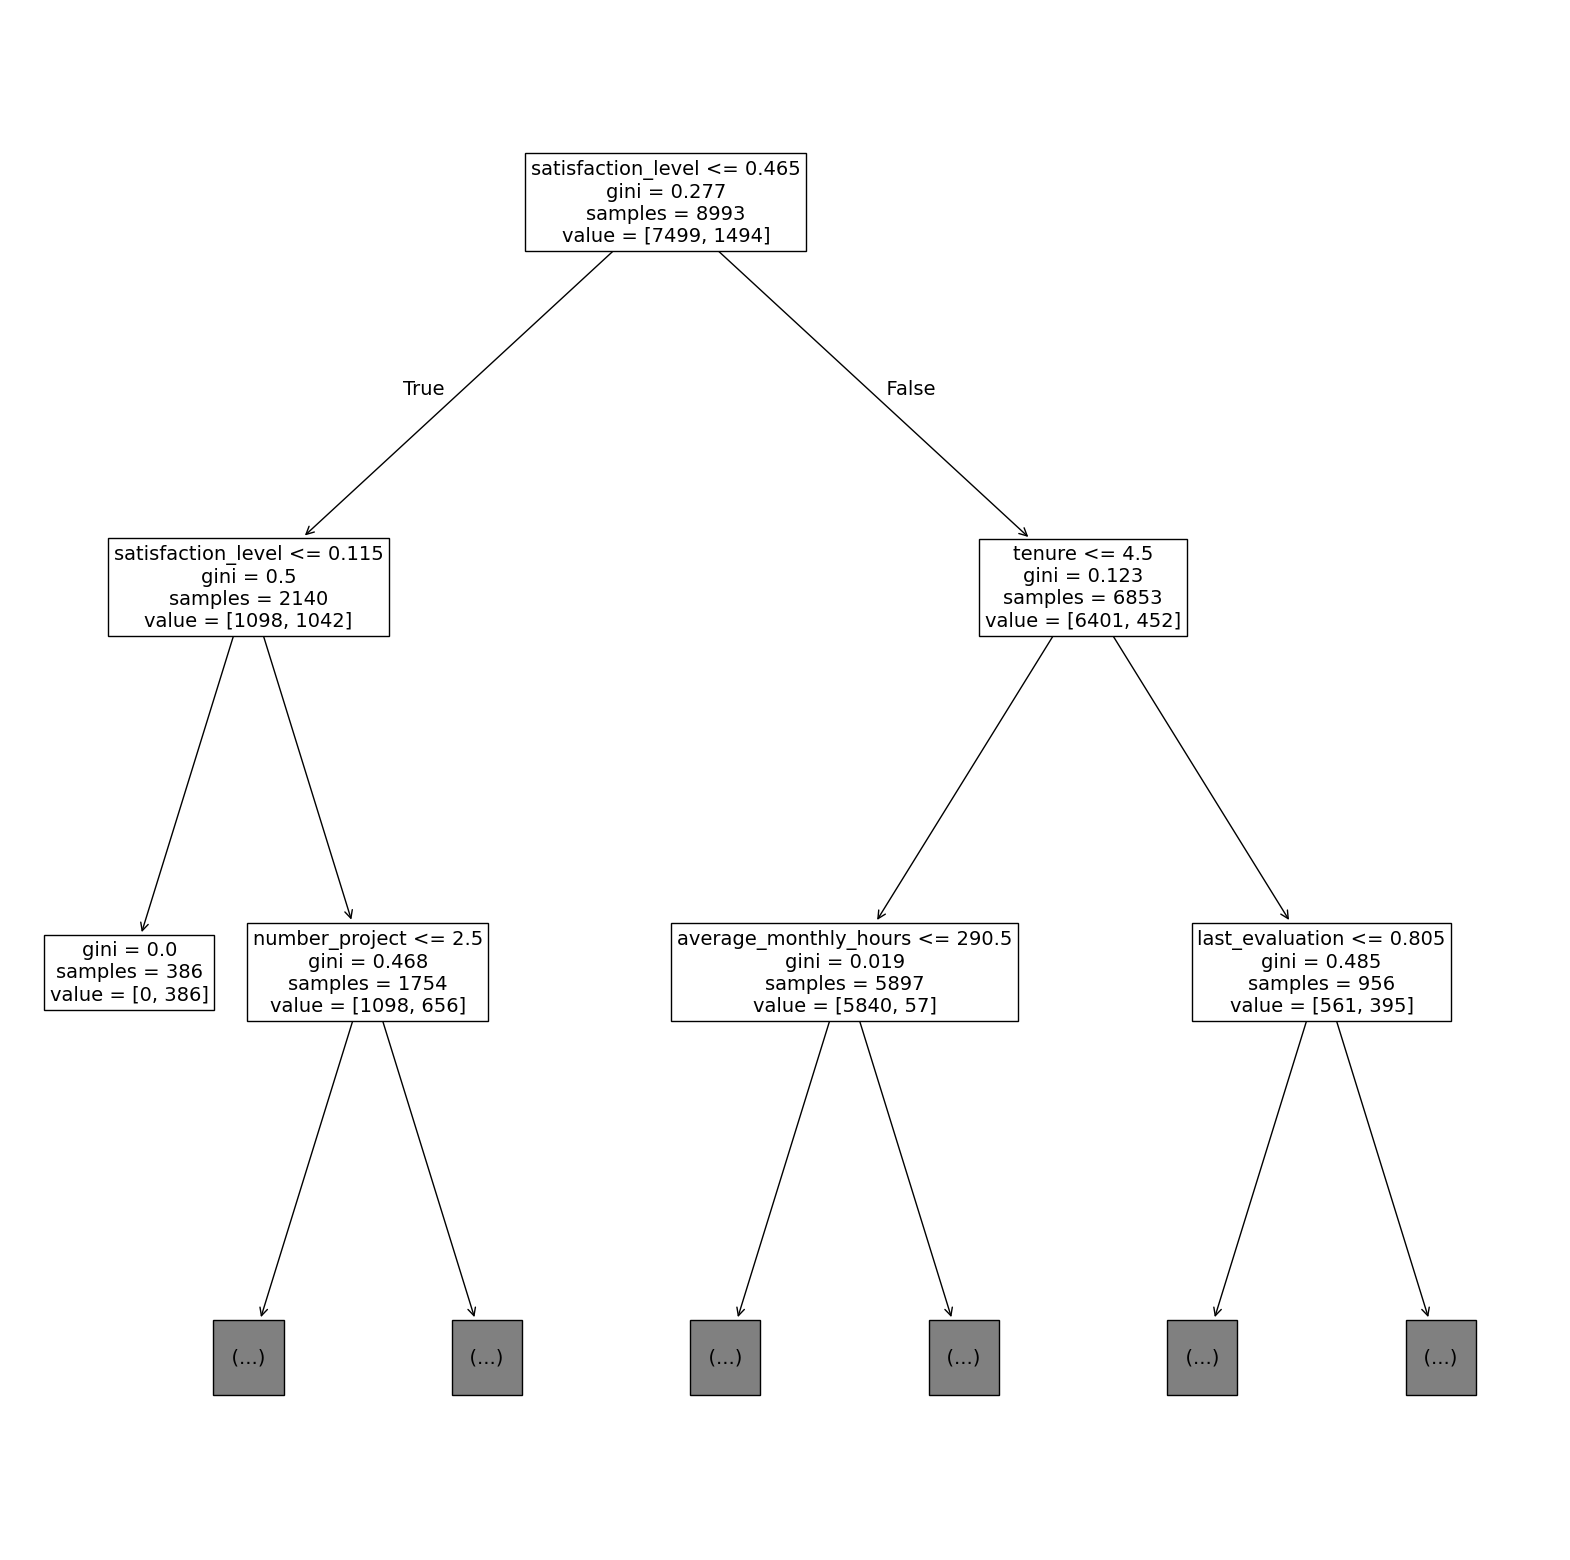

In [96]:
plt.figure(figsize=(20,20))
plot_tree(tree1.best_estimator_, max_depth=2,fontsize=14, feature_names=X.columns );

The visualization of the decision tree suggests that satisfaction_level, average_monthly_hours, number_project, and tenure are among the most important features.

Since decision trees are susceptible to overfitting, using a Random Forest model can help mitigate this issue by incorporating multiple trees to make predictions.

Next, let's construct a Random Forest Model.

#### Random Forest - First Iteration

In [97]:
# Instantiate the model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {"max_depth": [4, 6, 8, None ],
             "max_features" : [1.0],
             "max_samples": [0.7, 1.0],
             "min_samples_leaf": [1, 2, 3],
             "min_samples_split": [2, 3, 4],
             "n_estimators": [500]}

# Assign a dictionary of scoring metrics to capture 
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Instantiate Gridsearch
rf1 = GridSearchCV(rf,
                   cv_params,
                   scoring=scoring,
                   cv=4,
                   refit="roc_auc")


Fit the random forest to the training data

In [98]:
%%time

rf1.fit(X_train, y_train)

CPU times: total: 34min 54s
Wall time: 38min 44s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Define functions to pickle the model and read in the model

In [99]:
def write_pickle(model_object, save_as):
    
    with open(save_as + ".pickle", "wb") as to_write:
        pickle.dump(model_object, to_write)

In [100]:
def read_pickle(saved_model_name):
    
    with open(saved_model_name + ".pickle", "rb") as to_read:
        model = pickle.load(to_read)
    return model

Use the functions above to save the model in a pickle file and then read it in

In [101]:
# Write pickle
write_pickle(rf1, "hr_rf1")

In [102]:
# Read pickle
rf1 = read_pickle("hr_rf1")

Identify the best AUC score acheived by the randome forest model on the training set

In [103]:
# Check best AUC score on CV
rf1.best_score_

0.9790751171477935

Identify the optimal values for the parameters of the random forest

In [104]:
# Check the best params
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [106]:
# Get the CV scores
rf1_cv_results = make_results("random forest cv", rf1, "auc")
print(tree1_cv_results)
print(rf1_cv_results)

              Model        F1    recall  precision  accuracy      auc
0  Decision tree cv  0.947412  0.922352   0.973961  0.982987  0.96496
              Model       F1    recall  precision  accuracy       auc
0  random forest cv  0.95531  0.923019   0.989993  0.985655  0.976333


The evaluation scores of the Random Forest model are better than those of the Decision Tree model. This indicates that the Random Forest model outperformed the Decision Tree model.

Next, let's evaluate the final model on the test set. Define a function that gets all the scores from a model's predictions.

In [107]:
def get_scores(model_name, model, X_test_data, y_test_data):
    
    
    preds = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)    
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({"model": [model_name],
                         "accuracy": [accuracy],
                         "precision": [precision],
                         "recall": [recall],
                         "f1": [f1],
                         "AUC": [auc]})
    return table

Use the best performing model to predict on the test data

In [108]:
rf1_test_scores = get_scores("randoom forest1 test", rf1, X_test, y_test)
rf1_test_scores

model  accuracy  precision    recall        f1       AUC
0  randoom forest1 test  0.982322   0.984716  0.907445  0.944503  0.952323

The test scores being similar to the train scores is a good sign. However, it's wise to be cautious, as performance that seems too good to be true might indeed indicate data leakage, where information from outside the training dataset inadvertently influences the model.

* Instances of data leakage can occur when:

        * The data used to train a machine learning algorithm contains information that we are trying to predict.

        * Any feature whose value would not be available in practice at the time of prediction can introduce leakage to the model.

To address potential data leakage, consider the following steps:

- Review Features: Make sure that none of the features in the training data could reveal the target variable in any way.

- Cross-Validation: Ensure that cross-validation is properly set up to prevent any information leakage.

- Temporal Split: If your data is time-dependent, ensure a proper temporal split so that future information is not used to predict past events.

By carefully examining these aspects, you can mitigate the risk of data leakage and ensure the reliability of your model.

#### Feature Engineering

Considering there is suspicion around data leakage, let's dig in.

In this case, it’s likely that the company won't have satisfaction levels reported for all its employees. It is also possible that the average_monthly_hours feature is a source of some data leakage. If employees have already decided upon quitting, or have been identified by management as people to be fired, they may be working fewer hours.

The first iteration of the decision tree and random forest models included all variables as features. The next round will incorporate feature engineering to build improved models.

Since satisfaction_level might not be available for some employees as they might not have responded to the survey, we should proceed to drop it. Additionally, create a new feature called overworked to capture if an employee is overworked. It will be a binary variable.

In [110]:
# Drop `satisfaction_level`

df_ = df_enc.drop('satisfaction_level', axis=1)

df_.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [111]:
# Create `overworked` column.
df_["overworked"] = df_["average_monthly_hours"]

# Inspect max and min average monthy hours values
print(f"Max hours : {df_['overworked'].max()}")
print(f"Min hours : {df_['overworked'].min()}")

Max hours : 310
Min hours : 96


We already learned that 166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days a week, 8 hours per day.

I will define being overworked as working more than 170 hours per month on average.

In [112]:
# Define `overworked` as working > 170 hrs/month
df_["overworked"] = (df_["overworked"] > 170).astype(int)

df_["overworked"].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

Drop the `average_monthly_hours` column

In [113]:
# Drop the `average_monthly_hours`
df_ = df_.drop("average_monthly_hours", axis=1)

# Display first few rows for resulting dataframe
df_.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

In [114]:
# Isolate the outcome variable
y = df_["left"]

# select the features
X = df_.drop("left", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Second Iteration

In [115]:
# Instatiate the Decison tree model

decision_tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hypyparameters to search over 
cv_params = {"max_depth": [6, 8, 10, None],
            "min_samples_leaf": [2, 3, 5,1],
            "min_samples_split": [2, 4, 6, 8]
            }

# Assign a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Instantiate GridSearch
tree2 = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=5, refit="roc_auc")

In [116]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 16.3 s
Wall time: 19.2 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [6, 8, 10, None],
                         'min_samples_leaf': [2, 3, 5, 1],
                         'min_samples_split': [2, 4, 6, 8]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [117]:
# Checkthe best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 8}

In [118]:
# Check the best AUC score on CV
tree2.best_score_

0.9573155342566197

This model performs very well, even without the satisfaction levels and detailed hours worked data

Next check the other scores

In [119]:
tree2_cv_results = make_results("decision tree2 cv", tree2, "auc")
print(tree1_cv_results)
print(tree2_cv_results)

              Model        F1    recall  precision  accuracy      auc
0  Decision tree cv  0.947412  0.922352   0.973961  0.982987  0.96496
               Model        F1    recall  precision  accuracy       auc
0  decision tree2 cv  0.891429  0.896189   0.886791   0.96375  0.952031


We can observe a fall in the scores of all the metrics compared to the first model. This is to be expected as we used less features in this model. The scores are still good.

#### Random Forest - Second iteration

In [122]:
# Instantiate the Random Forest
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary to hyperparameters to search over
cv_params = {"max_depth": [2,3,5,8, None],
            "max_features": [1.0],
            "max_samples" : [0.7, 1.0],
            "min_samples_leaf": [1,2,3],
            "min_samples_split": [2,3,4],
            "n_estimators": [500]
            }

# Assign a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, verbose=1, cv=5, refit="roc_auc")

In [123]:
%%time
rf2.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
CPU times: total: 37min 54s
Wall time: 40min 7s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 5, 8, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=1)

In [124]:
# Write pickle
write_pickle(rf2, "hr_rf2")

In [125]:
# Read best params
rf2 = read_pickle("hr_rf2")

In [126]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [127]:
# Check best AUC score on CV
rf2.best_score_

0.9647998413802906

In [128]:
# Get all CV scores
rf2_cv_results = make_results("random forest2 cv", rf2, "auc")
print(tree2_cv_results)
print(rf2_cv_results)

               Model        F1    recall  precision  accuracy       auc
0  decision tree2 cv  0.891429  0.896189   0.886791   0.96375  0.952031
               Model        F1    recall  precision  accuracy       auc
0  random forest2 cv  0.899516  0.899524   0.899542  0.966641  0.962454


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

Score the champion model on the test set now

In [129]:
# Get predictions on test data
rf2_test_scores = get_scores("random forest2 test", rf2, X_test, y_test)
rf2_test_scores

model  accuracy  precision    recall        f1       AUC
0  random forest2 test   0.96064   0.866795  0.901606  0.883858  0.937003

This seems to be a stable, well-performing final model.

PLot a confusion matrix to visualize how well it predicts on the test set.

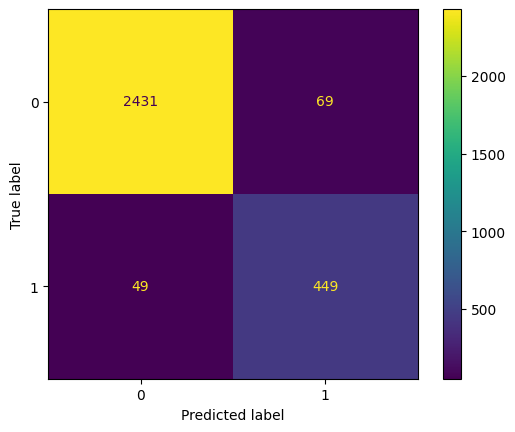

In [130]:
# Generate array of values for confusion matrix

preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(values_format="");

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired when that's actually not the case. However, this model performs better compared to the logistic regression model.

For exploratory purposes, let's inspect the splits of the decision tree model and the most important features in the random forest model.

#### Decision tree splits

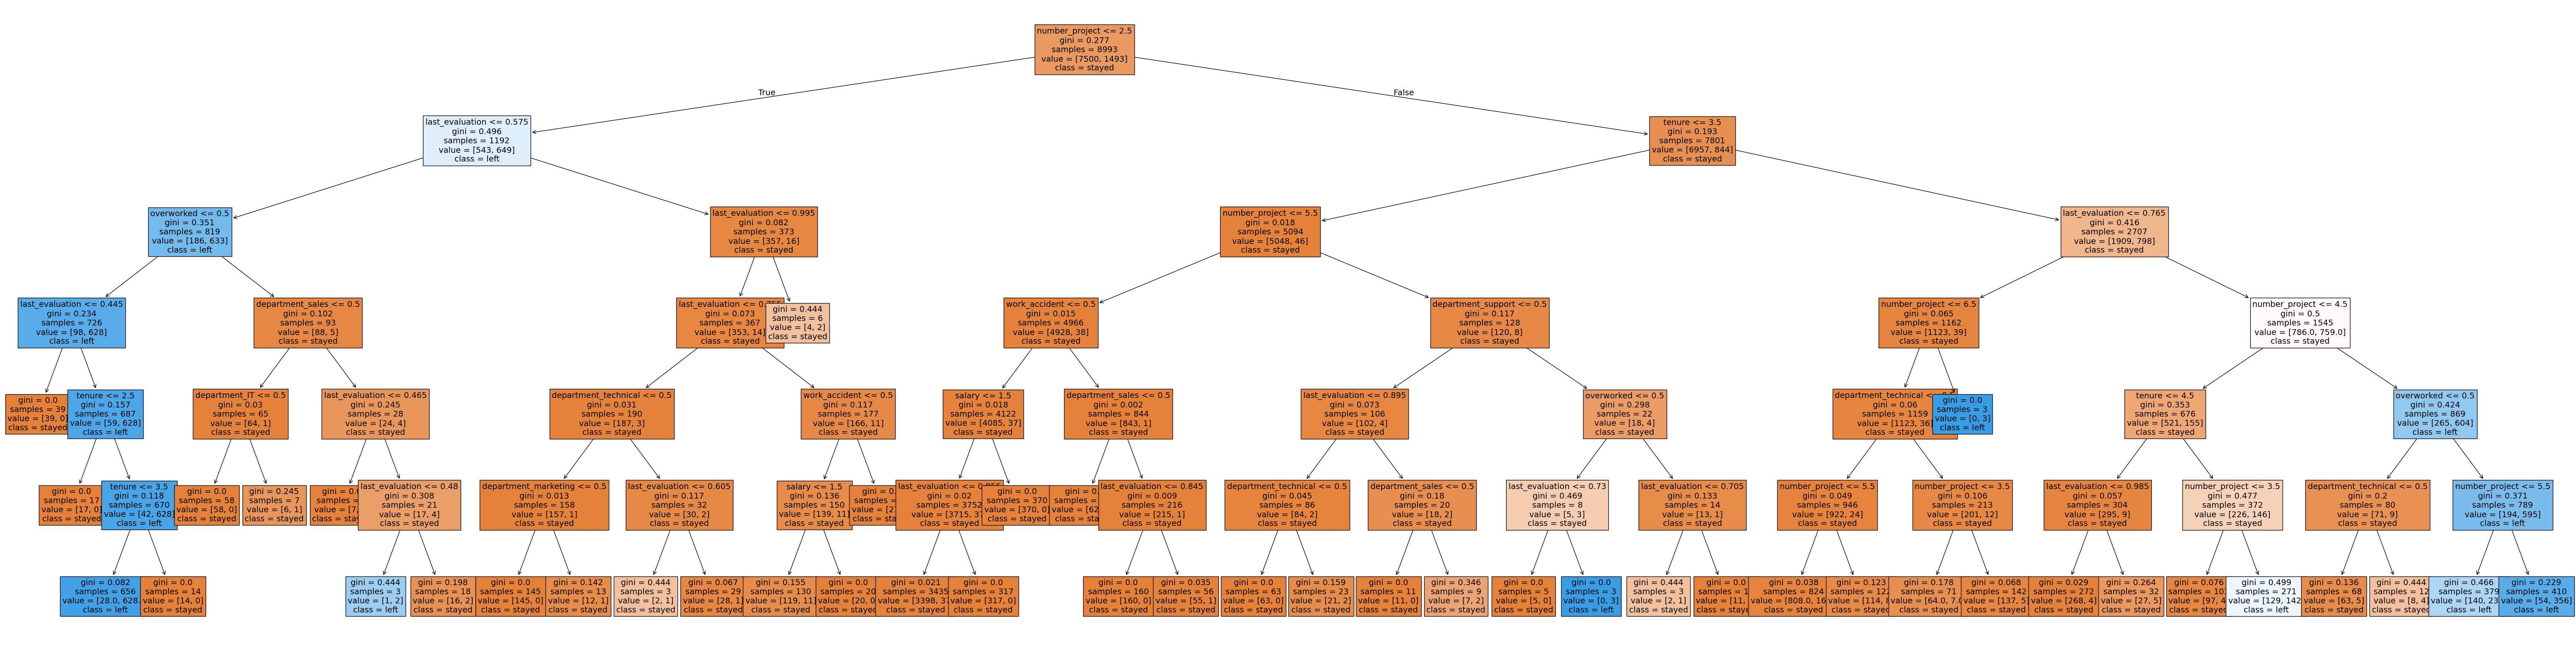

In [131]:
# Plot the tree
plt.figure(figsize=(80,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
         class_names={0:"stayed", 1:"left"}, filled=True);
plt.show()

#### Decision tree feature importances

In [132]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
number_project               0.344689
last_evaluation              0.344529
tenure                       0.214270
overworked                   0.093710
department_technical         0.001181
department_sales             0.000627
department_support           0.000419
work_accident                0.000183
salary                       0.000174
department_IT                0.000141
department_marketing         0.000078

Create a barplot to visualize the decision tree features importances

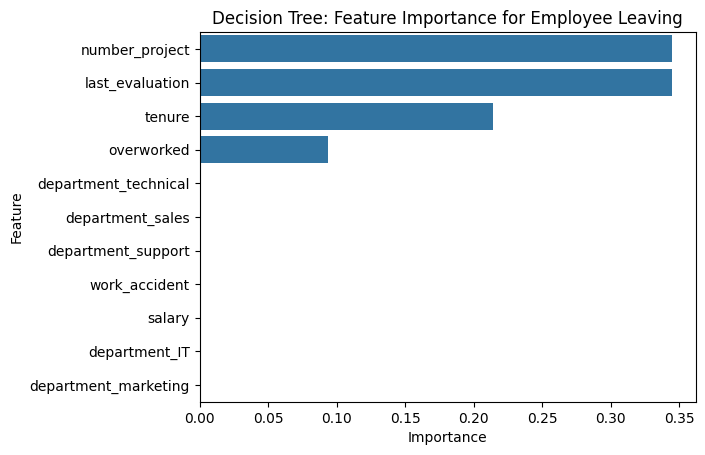

In [133]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient="h")
plt.title("Decision Tree: Feature Importance for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree modes, 
- `last_evaluation`, 
- `number_project`
- `tenure`
- `overworked` have the highest importance, in that order. 

These variables are most helpful in predicting the outocme varibale `left`

#### Random forest feature importance

Now, lets plot the feature importances for the Random Forest Model

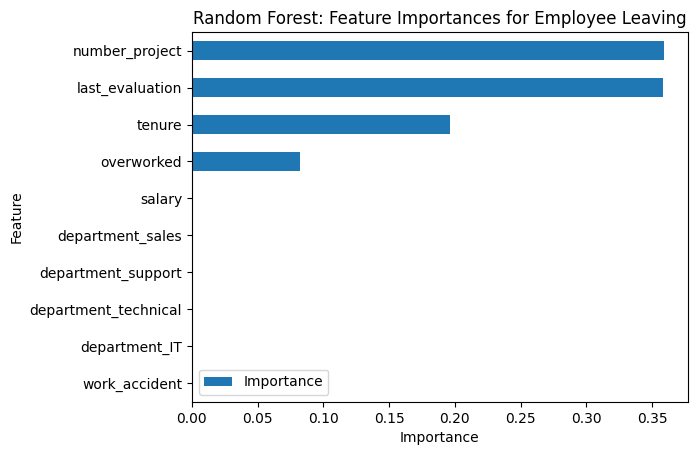

In [134]:
# Get feature importances 
feature_importance = rf2.best_estimator_.feature_importances_

# Get indices of top 10 figures
idx_top_ten = np.argpartition(feature_importance, -10)[-10:]

# Get the column labels of the top 10 features
feat = X.columns[idx_top_ten]


# Filter `feature_importance` to consist of top 10 feature importance
feature_importance = feature_importance[idx_top_ten]

y_df = pd.DataFrame({"Feature":feat,"Importance":feature_importance})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above show that in the random forest model, `last_evaluation`, `number_project`, `tenure`, `overworked` have the highest importance, in that order.  These varirables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model performed poorly in predicting the class we are interested in - if an employee will leave. Though the overall measurement metrics are above average

**Tress-based Machine Learning**

After conducting feature engineering to ensure robustness of the model, the decision tree acheived AUC of 93.8%, precision of 87%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

*   High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more.

*   Either reward employees for working longer hours, or don't require them to do so.

*   Consider promoting employees who have been with the company for at least 4 years, or conduct further investigation about why employees with 4-year tenures are so dissatisfied.

*   Cap the number of projects that employees can work on.

**Next Steps**

Given the model we have, it wouldn't be unreasonable to have some concerns about data leakage. Considering the last_evaluation metric might not be available for all employees when the model is in production, it could be a good idea to drop this feature.

Next, explore building a K-means model on this data and analyzing the clusters.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.